In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [ ]:
TRIDENT_data=pd.read_csv('TRIDENT.NS.csv');TRIDENT_data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-23,20.650000,20.650000,19.200001,19.500000,19.138344,22513349
1,2021-08-24,19.500000,20.450001,19.500000,20.450001,20.070726,16012280
2,2021-08-25,20.850000,21.150000,20.350000,20.450001,20.070726,15894004
3,2021-08-26,20.500000,20.950001,20.200001,20.350000,19.972582,9232645
4,2021-08-27,20.350000,20.500000,20.049999,20.150000,19.776291,7826611
...,...,...,...,...,...,...,...
243,2022-08-12,37.049999,38.650002,37.000000,37.599998,37.244255,7253768
244,2022-08-16,37.599998,38.000000,37.099998,37.250000,36.897568,11139472
245,2022-08-17,37.599998,38.900002,37.450001,38.049999,37.689999,12716702
246,2022-08-18,38.250000,38.500000,37.849998,38.099998,38.099998,7529834


In [ ]:
TRIDENT_data['Date'] = pd.to_datetime(TRIDENT_data['Date'], format='%Y-%m-%d')
TRIDENT_data = TRIDENT_data.sort_values(by='Date',ascending=True)
TRIDENT_data['Date'] = TRIDENT_data['Date'].dt.strftime('%d-%m-%Y') 
TRIDENT_data.set_index('Date',drop=True,inplace=True) 
TRIDENT_data.head(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
23-08-2021,20.650000,20.650000,19.200001,19.500000,19.138344,22513349
24-08-2021,19.500000,20.450001,19.500000,20.450001,20.070726,16012280
25-08-2021,20.850000,21.150000,20.350000,20.450001,20.070726,15894004
26-08-2021,20.500000,20.950001,20.200001,20.350000,19.972582,9232645
27-08-2021,20.350000,20.500000,20.049999,20.150000,19.776291,7826611
30-08-2021,20.350000,20.500000,20.150000,20.200001,19.825363,7299181
31-08-2021,20.400000,21.200001,20.150000,20.650000,20.267015,18666411
01-09-2021,20.750000,21.650000,20.450001,21.549999,21.150324,18303344
02-09-2021,21.549999,22.600000,21.299999,22.600000,22.180851,34893154


In [ ]:
data = TRIDENT_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1); data

,Close
Date,
23-08-2021,19.500000
24-08-2021,20.450001
25-08-2021,20.450001
26-08-2021,20.350000
27-08-2021,20.150000
...,...
12-08-2022,37.599998
16-08-2022,37.250000
17-08-2022,38.049999


In [ ]:
date = list(TRIDENT_data.index)

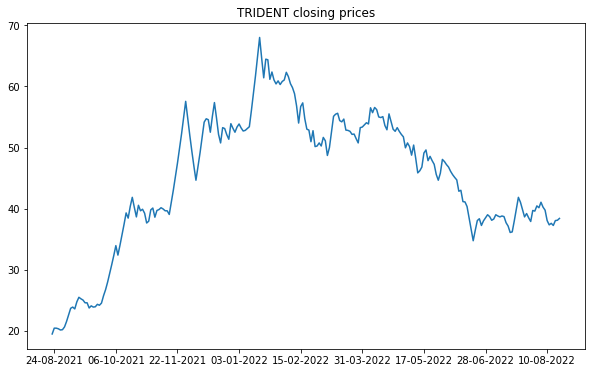

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data)
index = np.arange(1,248,30)
plt.xticks(index, labels = date[1:248:30])
plt.title('TRIDENT closing prices')
plt.show()

In [ ]:
def load_data(stock, look_back):
    data_raw = stock # convert to numpy array
    data = []
    
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back])
    
    data = np.array(data);
    test_set_size = int(np.round(0.25*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    date_train = date[10:train_set_size+10]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    date_test = date[train_set_size+10:-1]
    #return [x_train, y_train, x_test, y_test]
    return [x_train, y_train, date_train, x_test, y_test, date_test]

In [ ]:
sc = MinMaxScaler()
data = sc.fit_transform(data)

x_train, y_train, date_train, x_test, y_test, date_test = load_data(data, 11)

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('date_train length = ', len(date_train))
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)
print('date_test length = ', len(date_test))

x_train.shape =  (178, 10, 1)
y_train.shape =  (178, 1)
date_train length =  178
x_test.shape =  (59, 10, 1)
y_test.shape =  (59, 1)
date_test length =  59


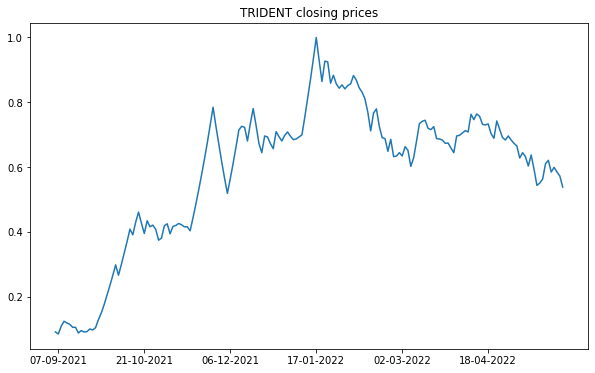

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_train)
index = np.arange(1,178,30)
plt.xticks(index, labels = date_train[1:178:30])
plt.title('TRIDENT closing prices')
plt.show()

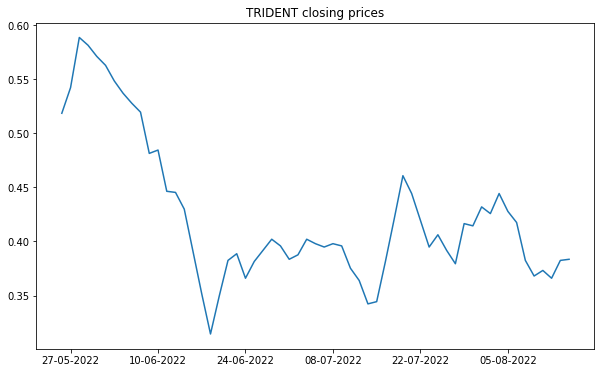

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test)
index = np.arange(1,59,10)
plt.xticks(index, labels = date_test[1:59:10])
plt.title('TRIDENT closing prices')
plt.show()

In [ ]:
# make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [ ]:
# Build model
#####################
input_dim = 1
hidden_dim = 10
num_layers = 4 
output_dim = 1


# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out
    
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 10, num_layers=4, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)
18
torch.Size([40, 1])
torch.Size([40, 10])
torch.Size([40])
torch.Size([40])
torch.Size([40, 10])
torch.Size([40, 10])
torch.Size([40])
torch.Size([40])
torch.Size([40, 10])
torch.Size([40, 10])
torch.Size([40])
torch.Size([40])
torch.Size([40, 10])
torch.Size([40, 10])
torch.Size([40])
torch.Size([40])
torch.Size([1, 10])
torch.Size([1])


In [ ]:
sum(i.numel() for i in model.parameters())

3171

In [ ]:
num_epochs = 550
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =10


for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

Epoch  10 MSE:  0.07089941948652267
Epoch  20 MSE:  0.05243734270334244
Epoch  30 MSE:  0.04902588203549385
Epoch  40 MSE:  0.04703173041343689
Epoch  50 MSE:  0.0387539342045784
Epoch  60 MSE:  0.016803819686174393
Epoch  70 MSE:  0.010969636030495167
Epoch  80 MSE:  0.008165886625647545
Epoch  90 MSE:  0.008059314452111721
Epoch  100 MSE:  0.007413308136165142
Epoch  110 MSE:  0.007148937787860632
Epoch  120 MSE:  0.0075612301006913185
Epoch  130 MSE:  0.006913937162607908
Epoch  140 MSE:  0.006785491947084665
Epoch  150 MSE:  0.005171973258256912
Epoch  160 MSE:  0.005451860837638378
Epoch  170 MSE:  0.005476681981235743
Epoch  180 MSE:  0.0042549544014036655
Epoch  190 MSE:  0.0033297233749181032
Epoch  200 MSE:  0.00287291849963367
Epoch  210 MSE:  0.0026063064578920603
Epoch  220 MSE:  0.0023322871420532465
Epoch  230 MSE:  0.002070592949166894
Epoch  240 MSE:  0.0019121564691886306
Epoch  250 MSE:  0.001736633712425828
Epoch  260 MSE:  0.001607515150681138
Epoch  270 MSE:  0.001

In [ ]:
# make predictions
y_test_pred = model(x_test)
y_train_pred = model(x_train)



# invert predictions
y_train_pred = sc.inverse_transform(y_train_pred.data.numpy())
y_train = sc.inverse_transform(y_train.data.numpy())
y_test_pred = sc.inverse_transform(y_test_pred.data.numpy())
y_test = sc.inverse_transform(y_test.data.numpy())

# calculate root mean squared error
trainScore = sqrt(mse(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = sqrt(mse(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.45 RMSE
Test Score: 1.25 RMSE


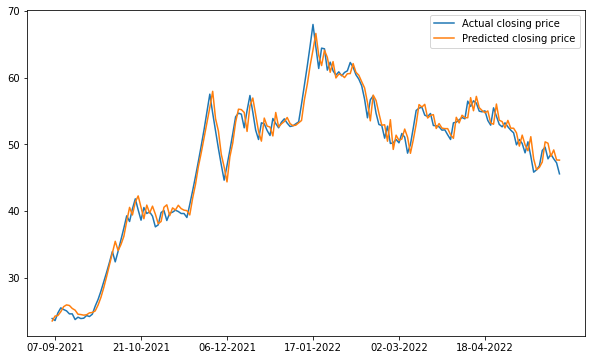

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_train, label = 'Actual closing price')
plt.plot(y_train_pred, label = 'Predicted closing price')
index = np.arange(1,178,30)

plt.xticks(index, labels = date_train[1:178:30])
plt.legend()
plt.show()

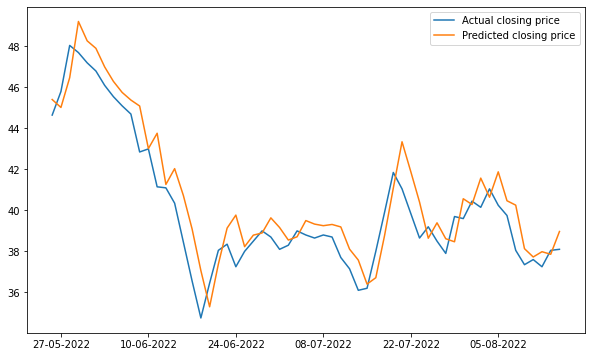

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label = 'Actual closing price')
plt.plot(y_test_pred, label = 'Predicted closing price')
index = np.arange(1,59,10)
plt.xticks(index, labels = date_test[1:59:10])
plt.legend()
plt.show()